# Homework 9 Clustering and PCA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



- **Yuzhen Hu  Id: 2299391**
- **Deekshitha Gona Id: 2399282**
- **Jayaprakash Yadav Guntumani Id: 2391724**
- **Aakanksha Govindaraju Id: 2384001**
- **George Dani Id: 1844097**

# Part a : Clustering
## Create clusters using the following algorithms:
#### i. K-Means Clustering
#### ii. Agglomerative Clustering
#### iii. DBSCAN
**Investigate the values of hyperparameters for each of these algorithms.**
**Analyze the quality of clustering solutions.**
**Identify and select the best clustering solution.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import cophenet, linkage, dendrogram
from scipy.spatial.distance import pdist

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ML/Homeworks/Homework9/wine.csv')
df.head(10)

Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   
5     1    14.20        1.76  2.45  15.2  112     3.27        3.39   
6     1    14.39        1.87  2.45  14.6   96     2.50        2.52   
7     1    14.06        2.15  2.61  17.6  121     2.60        2.51   
8     1    14.83        1.64  2.17  14.0   97     2.80        2.98   
9     1    13.86        1.35  2.27  16.0   98     2.98        3.15   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  
5                  0.34     1.97       6.75  1.05  2.85     1450  
6                  0.30     1.98       5.25  1.02  3.58     1290  
7                  0.31     1.25       5.05  1.06  3.58     1295  
8                  0.29     1.98       5.20  1.08  2.85     1045  
9                  0.22     1.85       7.22  1.01  3.55     1045

###  Doing feature scaling for column 2-14

In [5]:
# Scale data with MinMaxScaler
import os
os.environ["OMP_NUM_THREADS"] = "1"
scaler = MinMaxScaler()
columns_to_scale = df.columns[1:14]
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale].values)
df.head(10)


Wine   Alcohol  Malic.acid       Ash       Acl        Mg   Phenols  \
0     1  0.842105    0.191700  0.572193  0.257732  0.619565  0.627586   
1     1  0.571053    0.205534  0.417112  0.030928  0.326087  0.575862   
2     1  0.560526    0.320158  0.700535  0.412371  0.336957  0.627586   
3     1  0.878947    0.239130  0.609626  0.319588  0.467391  0.989655   
4     1  0.581579    0.365613  0.807487  0.536082  0.521739  0.627586   
5     1  0.834211    0.201581  0.582888  0.237113  0.456522  0.789655   
6     1  0.884211    0.223320  0.582888  0.206186  0.282609  0.524138   
7     1  0.797368    0.278656  0.668449  0.360825  0.554348  0.558621   
8     1  1.000000    0.177866  0.433155  0.175258  0.293478  0.627586   
9     1  0.744737    0.120553  0.486631  0.278351  0.304348  0.689655   

   Flavanoids  Nonflavanoid.phenols   Proanth  Color.int       Hue        OD  \
0    0.573840              0.283019  0.593060   0.372014  0.455285  0.970696   
1    0.510549              0.245283  0.274448   0.264505  0.463415  0.780220   
2    0.611814              0.320755  0.757098   0.375427  0.447154  0.695971   
3    0.664557              0.207547  0.558360   0.556314  0.308943  0.798535   
4    0.495781              0.490566  0.444795   0.259386  0.455285  0.608059   
5    0.643460              0.396226  0.492114   0.466724  0.463415  0.578755   
6    0.459916              0.320755  0.495268   0.338737  0.439024  0.846154   
7    0.457806              0.339623  0.264984   0.321672  0.471545  0.846154   
8    0.556962              0.301887  0.495268   0.334471  0.487805  0.578755   
9    0.592827              0.169811  0.454259   0.506826  0.430894  0.835165   

    Proline  
0  0.561341  
1  0.550642  
2  0.646933  
3  0.857347  
4  0.325963  
5  0.835949  
6  0.721826  
7  0.725392  
8  0.547076  
9  0.547076

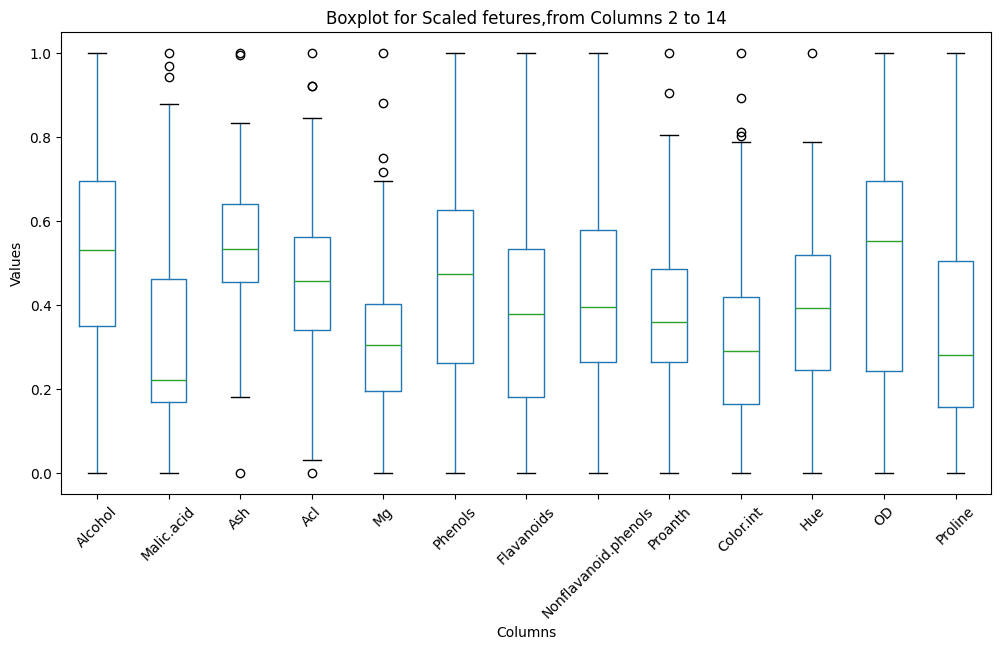

In [6]:
# Select columns 2 to 14 for the boxplot
columns_to_plot = df.columns[1:14]

# Generate the boxplot
plt.figure(figsize=(12, 6))
df[columns_to_plot].boxplot()
plt.title("Boxplot for Scaled fetures,from Columns 2 to 14")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.grid(False)  # Optional: Turn off the grid for a cleaner look
plt.show()

In [7]:
# data_X is scaled
data_X = df.iloc[:, 1:].values
data_X.shape

(178, 13)

## i. K-Means Clustering

In [8]:

# Fit K-Means
kmeans = KMeans(n_clusters=2,init='k-means++',n_init = 10, random_state=42)
kmeans.fit(data_X)

# Add cluster labels to the original data
df['Cluster'] = kmeans.labels_
print(df)

     Wine   Alcohol  Malic.acid       Ash       Acl        Mg   Phenols  \
0       1  0.842105    0.191700  0.572193  0.257732  0.619565  0.627586   
1       1  0.571053    0.205534  0.417112  0.030928  0.326087  0.575862   
2       1  0.560526    0.320158  0.700535  0.412371  0.336957  0.627586   
3       1  0.878947    0.239130  0.609626  0.319588  0.467391  0.989655   
4       1  0.581579    0.365613  0.807487  0.536082  0.521739  0.627586   
..    ...       ...         ...       ...       ...       ...       ...   
173     3  0.705263    0.970356  0.582888  0.510309  0.271739  0.241379   
174     3  0.623684    0.626482  0.598930  0.639175  0.347826  0.282759   
175     3  0.589474    0.699605  0.481283  0.484536  0.543478  0.210345   
176     3  0.563158    0.365613  0.540107  0.484536  0.543478  0.231034   
177     3  0.815789    0.664032  0.737968  0.716495  0.282609  0.368966   

     Flavanoids  Nonflavanoid.phenols   Proanth  Color.int       Hue  \
0      0.573840            

### Hyperparameter adjusting for K-mean, Experimenting with different k values

k = 2, Inertia = 64.5376670238943
k = 3, Inertia = 48.96051713667649
k = 4, Inertia = 44.769330540824754
k = 5, Inertia = 42.33116673787659
k = 6, Inertia = 39.739481476121725
k = 7, Inertia = 38.22981582068443
k = 8, Inertia = 36.43183676027268
k = 9, Inertia = 34.57380477849683
k = 10, Inertia = 33.30421187209753


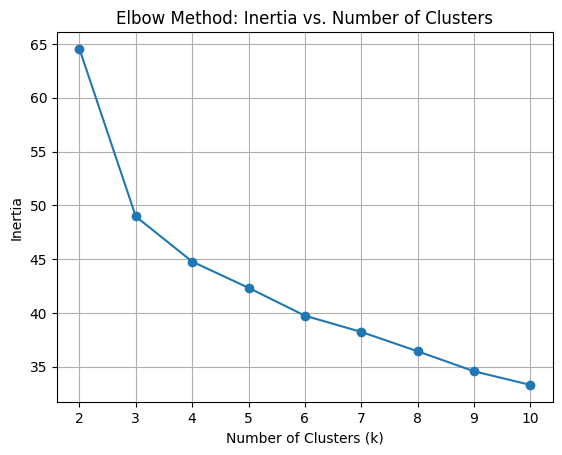

In [9]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Define a range for the number of clusters (k)
k_values = range(2, 11)  # Test k from 1 to 10
inertia = []

# Fit K-Means for each k and collect inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k,init='k-means++', n_init =10,  random_state=42)
    kmeans.fit(data_X)  # Replace X with your data
    inertia.append(kmeans.inertia_)  # Store the inertia

# Print inertia for each k
for i, inert in zip(k_values, inertia):
    print(f"k = {i}, Inertia = {inert}")

# Plot inertia vs. k
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.grid()
plt.show()


### From the plot above, we observe that the elbow is located between 3 and 5 clusters. Next, we will calculate the silhouette score to evaluate the clustering performance

In [10]:
# Calculate silhouette scores for each k
silhouette_scores = {}
for k in range(2,6):
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data_X)
    silhouette_avg = silhouette_score(data_X, cluster_labels)
    silhouette_scores[k] = silhouette_avg
    print(f"Silhouette Score for k={k}: {silhouette_avg:.4f}")

Silhouette Score for k=2: 0.2987
Silhouette Score for k=3: 0.3009
Silhouette Score for k=4: 0.2599
Silhouette Score for k=5: 0.2049



### Based on the silhouette scores, \(k = 3\) is the optimal number of clusters for this dataset. Visualizations of the silhouette plots for each 𝑘 are shown below, providing further insights to validate this conclusion.

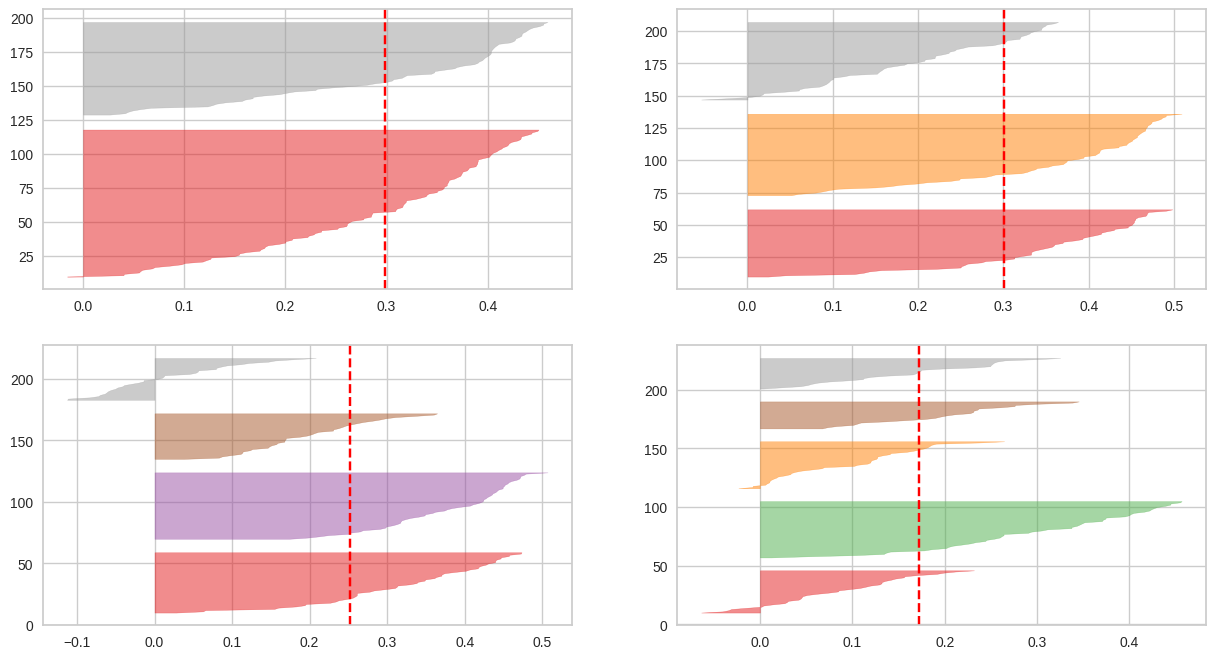

In [11]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in range(2,6):

    km = KMeans(n_clusters=k)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, ax=ax[q-1][mod])
    visualizer.fit(data_X)

## ii. Agglomerative Clustering

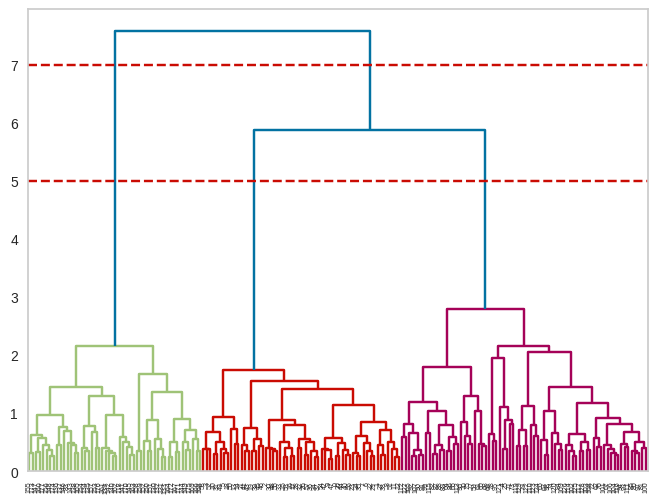

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(8,6))
#dendrogram(linkage(data_X, method='single'));
#dendrogram(linkage(data_X, method='average'));
dendrogram(linkage(data_X, method='ward'));
plt.axhline(y=5, color='r', linestyle='--')
plt.axhline(y=7, color='r', linestyle='--')
plt.grid();

### Adjust hyperparameters of Agglomerative clustering

In [15]:
agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_cluster.fit_predict(data_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define hyperparameter ranges
n_clusters_range = range(2, 7)  # Try from 2 to 6 clusters

# For storing results
best_score = -1
best_params = {}

# Iterate over all combinations of hyperparameters
for n_clusters in n_clusters_range:
    # Fit the model
    clustering = AgglomerativeClustering(
        n_clusters=n_clusters,
        metric='euclidean',
        linkage='ward'
    )
    labels = clustering.fit_predict(data_X)

    # Calculate silhouette score
    score = silhouette_score(data_X, labels)

    # Print the silhouette score for the current value of n_clusters
    print(f"Silhouette Score for K={n_clusters}: {score:.4f}")

    # Update best score and parameters if the score is improved
    if score > best_score:
        best_score = score
        best_params = {
            'n_clusters': n_clusters,
            'linkage': 'ward',
            'affinity': 'euclidean',
        }

# Output best hyperparameters
print("\nBest Silhouette Score:", best_score)
print("Best Parameters:", best_params)


Silhouette Score for K=2: 0.2967
Silhouette Score for K=3: 0.2948
Silhouette Score for K=4: 0.2487
Silhouette Score for K=5: 0.2042
Silhouette Score for K=6: 0.2078

Best Silhouette Score: 0.29666794582183303
Best Parameters: {'n_clusters': 2, 'linkage': 'ward', 'affinity': 'euclidean'}


####  Summary: Agglomerative Clustering using Silhouette Score as metric,  Optimal results: Best Silhouette Score = 0.2967, with n_clusters=2, linkage='ward', and distance metric ='euclidean'

## iii. DBSCAN

In [18]:
dbscan = DBSCAN(eps=0.5, min_samples=6)
dbscan.fit(data_X)
labels = dbscan.fit_predict(data_X)
np.unique(labels, return_counts=True)

(array([-1,  0,  1]), array([ 29, 101,  48]))

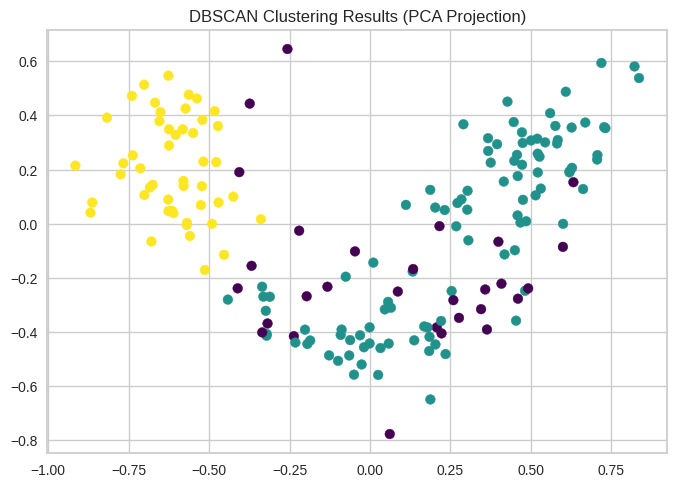

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_X)  # Reduce to 2D

# Plot the clusters and noise points
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering Results (PCA Projection)")
plt.show()


**using PCA projection to observe DBSCAN clustering result ,dark purple points are noise**


In [20]:
# dbscan.core_sample_indices_
len(dbscan.core_sample_indices_)

113

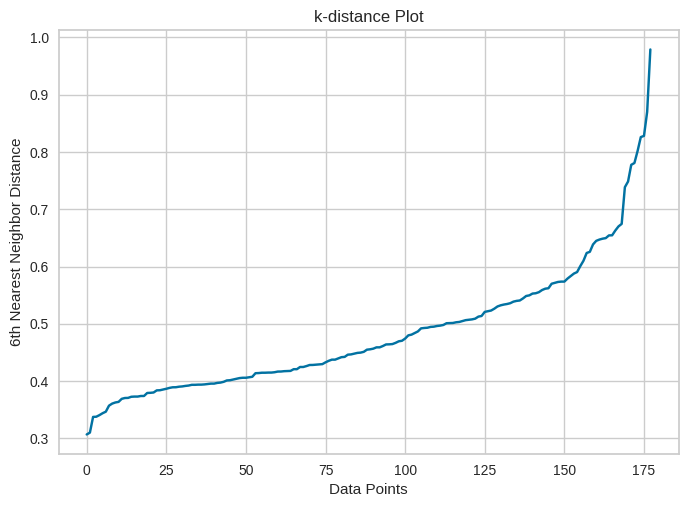

In [21]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Find the distances to the 6th nearest neighbor (min_samples)
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(data_X)
distances, indices = neighbors_fit.kneighbors(data_X)
distances = np.sort(distances[:, 5])  # Sort the distances to the 4th neighbor

# Plot the k-distance graph
plt.plot(distances)
plt.title("k-distance Plot")
plt.xlabel("Data Points")
plt.ylabel("6th Nearest Neighbor Distance")
plt.show()


**From above K-distance plot ,we can read that eps change most dramatically around 0.6**

### Adjust hyperparameters for DBSCAN ,experimenting with different eps and min_sample values

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
import numpy as np
eps_values = np.linspace(0.02, 0.6, 30)  # Generates 10 evenly spaced values between 0.2 and 1.5
min_samples_values = range(5, 15, 5)    # Generates values: [5, 10, 15]

param_grid = {'eps': eps_values, 'min_samples': min_samples_values}
best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples']).fit(data_X)
    labels = dbscan.labels_

    # Check if there are at least 2 non-noise clusters
    non_noise_labels = np.unique(labels[labels != -1])
    if len(non_noise_labels) > 1:
        score = silhouette_score(data_X, labels)
        if score > best_score:
            best_score = score
            best_params = params

if best_params:
    print("Best parameters:", best_params)
    print("Best silhouette score:", best_score)
else:
    print("No valid clustering configuration found.")



Best parameters: {'eps': 0.5399999999999999, 'min_samples': 10}
Best silhouette score: 0.23033368421609526


In [23]:
dbscan = DBSCAN(eps=0.54, min_samples=10)
dbscan.fit(data_X)
labels = dbscan.fit_predict(data_X)
np.unique(labels, return_counts=True)

(array([-1,  0,  1]), array([ 21, 109,  48]))

####  Summary: for DBSCAN ,we can see the optimal eps value is eps:0.54 and min_samples :10, with k=2, and Best Silhouette Score: 0.23

## Clustering Results Summary

  ### **K-Means (K = 3)**: The highest **Silhouette Score** of 0.30 is achieved




# Part b : Plot the best clustering solution in two dimensions using:
### i. Pairs of attributes.
### ii. Principal Component Analysis (PCA).


## When K = 3

In [24]:

# Fit K-Means
kmeans_3 = KMeans(n_clusters=3,init='k-means++',n_init = 10, random_state=42)
kmeans_3.fit(data_X)
kmean_labels_3 = kmeans_3.labels_
df['Cluster'] = kmean_labels_3


### i visualize pairs of attribute

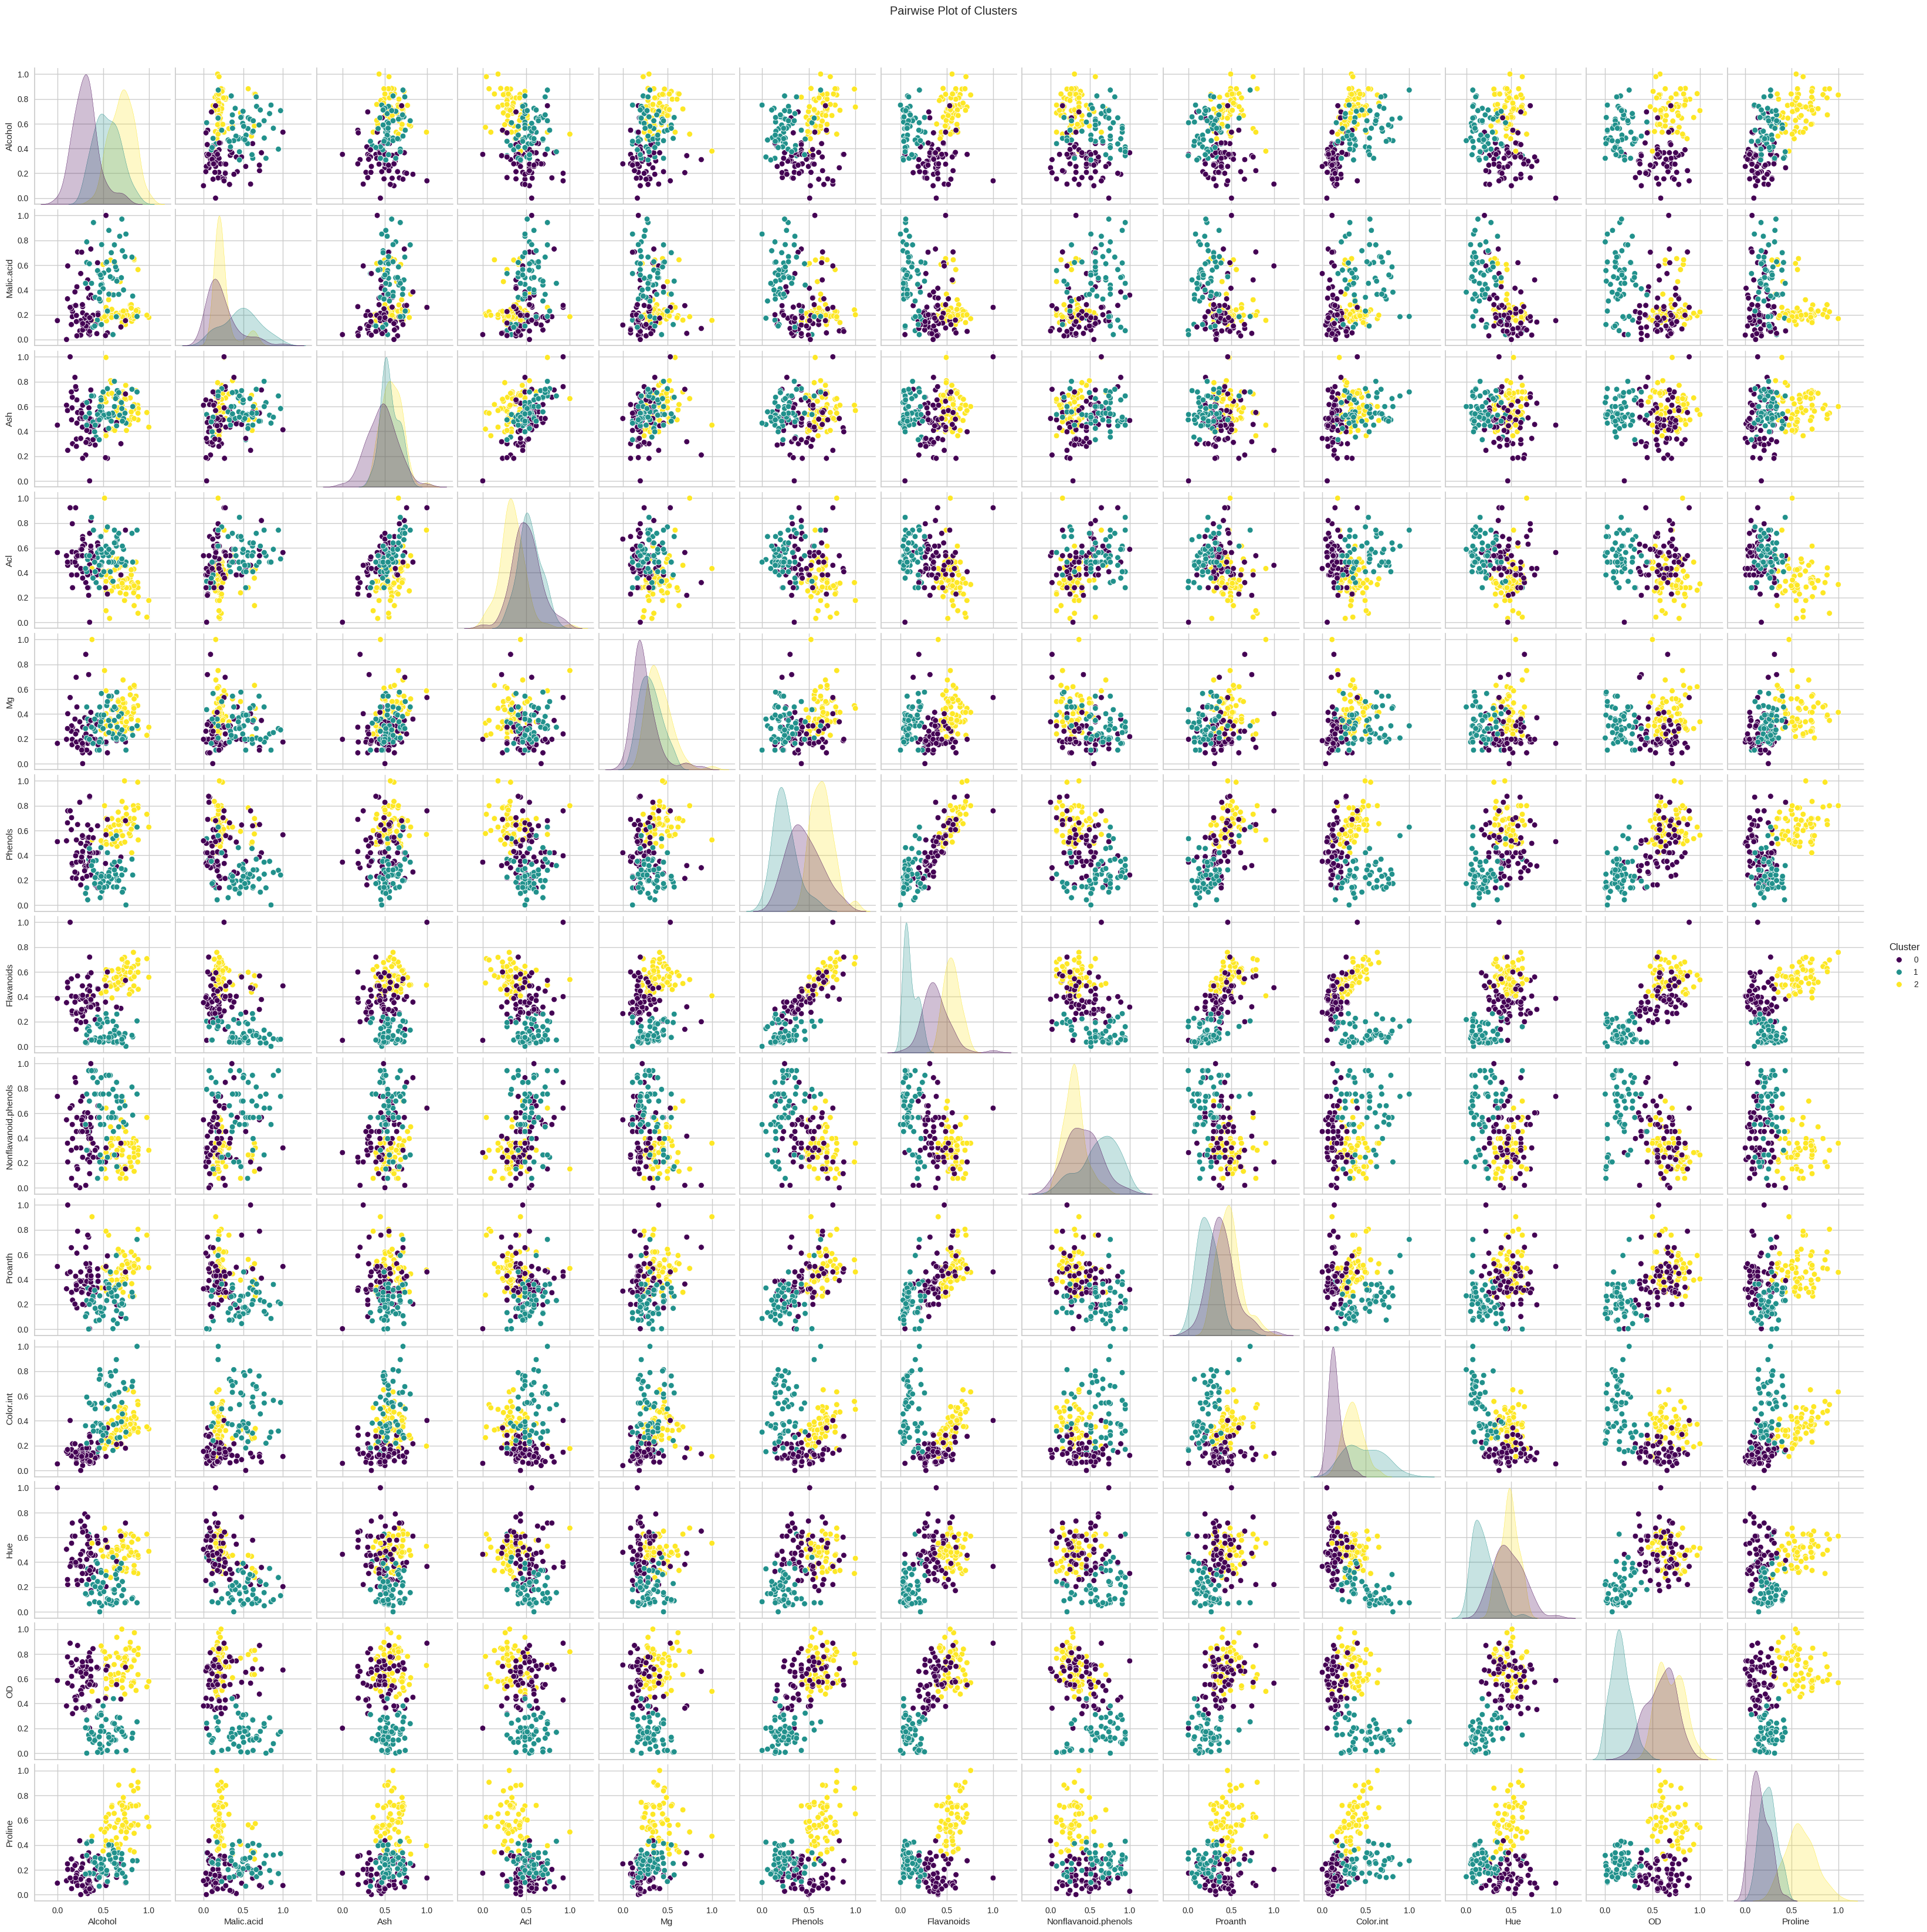

In [25]:
import seaborn as sns
sns.pairplot(df, vars=df.columns[1:14], hue='Cluster', palette='viridis')

# Add a title to the plot
plt.suptitle("Pairwise Plot of Clusters", y=1.02)

# Show the plot
plt.show()

### ii visualize  PCA 2D projection

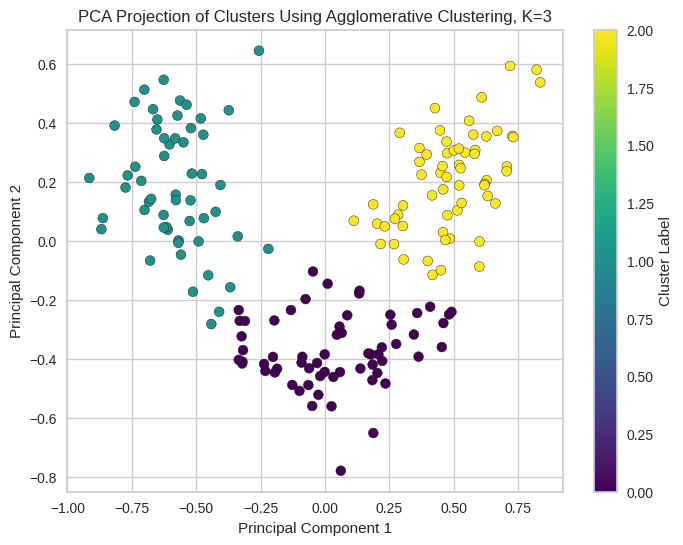

In [26]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_X)

# Create a scatter plot of the two principal components
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmean_labels_3, cmap='viridis', edgecolor='k', s=50)
plt.title("PCA Projection of Clusters Using Agglomerative Clustering, K=3")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()


# Part C : Compare the labels of the best clustering solution with the original data labels in the column "wine".

In [27]:
true_labels = df['Wine']
predicted_labels = df['Cluster']

In [28]:
true_labels.unique()

class_counts = true_labels.value_counts()

print(class_counts)

Wine
2    71
1    59
3    48
Name: count, dtype: int64


###  Since the "wine " column has 3 categories, we are going to use K= 3

In [29]:
predicted_labels.unique()
class_counts = predicted_labels.value_counts()

print(class_counts)

Cluster
0    62
2    61
1    55
Name: count, dtype: int64


###  Using maxvoting to match labels to get most accuracy ,we can match manually or using below code to match

In [30]:
import numpy as np
from sklearn.metrics import accuracy_score

# Majority voting for each cluster
cluster_to_true_label = {}
for cluster_label in np.unique(predicted_labels):
    cluster_indices = (predicted_labels == cluster_label)
    # Get the most common true label for this cluster
    most_common_true_label = true_labels[cluster_indices].mode()[0]
    cluster_to_true_label[cluster_label] = most_common_true_label

# Map the K-Means clusters to true labels
mapped_labels = np.array([cluster_to_true_label[label] for label in predicted_labels])

# Add the mapped labels as a new column in the DataFrame
df['Mapped_Cluster'] = mapped_labels
class_counts = df['Mapped_Cluster'].value_counts()

print(class_counts)

Mapped_Cluster
2    62
1    61
3    55
Name: count, dtype: int64


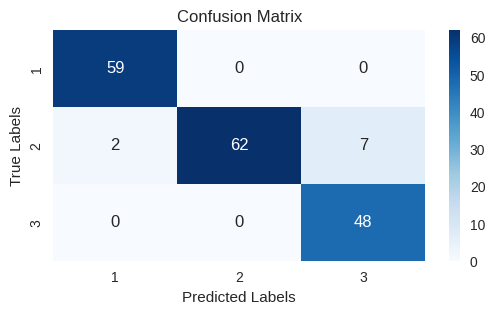

In [31]:

from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming 'df' is your DataFrame, 'Wine' is the true labels column,
# and 'Cluster' is the column containing K-Means clustering results
true_labels = df['Wine']  # True class labels
predicted_labels = df['Mapped_Cluster']  # K-Means cluster labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [32]:
# Compare the mapped clusters with the true labels
accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy of K-Means clustering: {accuracy * 100:.2f}%")


Accuracy of K-Means clustering: 94.94%


## Summary : the K-means accuracy is 94.94% when comparing with original data labels